In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import IPython.display as ipd

import librosa

from glob import glob

In [7]:
# audio_files = glob('..\\data\\audio\\today\\*.mp3')
audio_files = glob('..\\data\\audio\\to_process\\*.wav')
len(audio_files), audio_files[0]

(1, '..\\data\\audio\\to_process\\2f1f0f8d-6fec-4736-a9e2-a6cf88c806c9.wav')

In [8]:
ipd.Audio(audio_files[0])

## Making Spectrograms
### 1. loading a file

In [33]:
y, sr = librosa.load(audio_files[0])
y.shape, sr

C:\Users\burjo\AppData\Local\Temp\ipykernel_17776\2167143664.py:1: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_files[0])
c:\Users\burjo\miniconda3\envs\speech\lib\site-packages\librosa\core\audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


((42336,), 22050)

In [36]:
y, index = librosa.effects.trim(y, top_db=30, frame_length=256, hop_length=64)

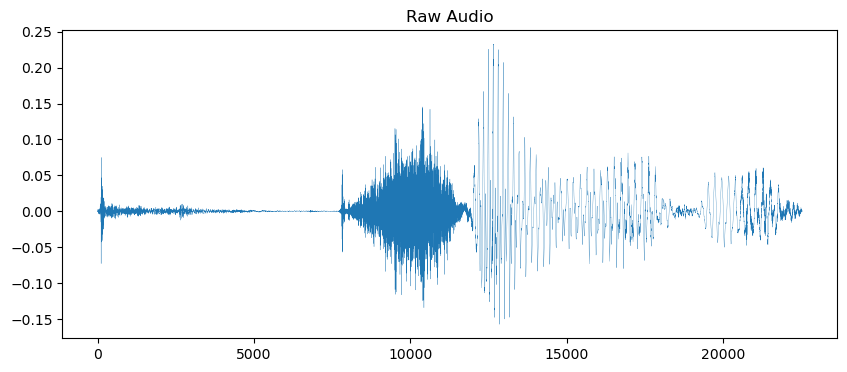

In [37]:
pd.Series(y).plot(figsize=(10, 4), lw=0.2, title='Raw Audio');

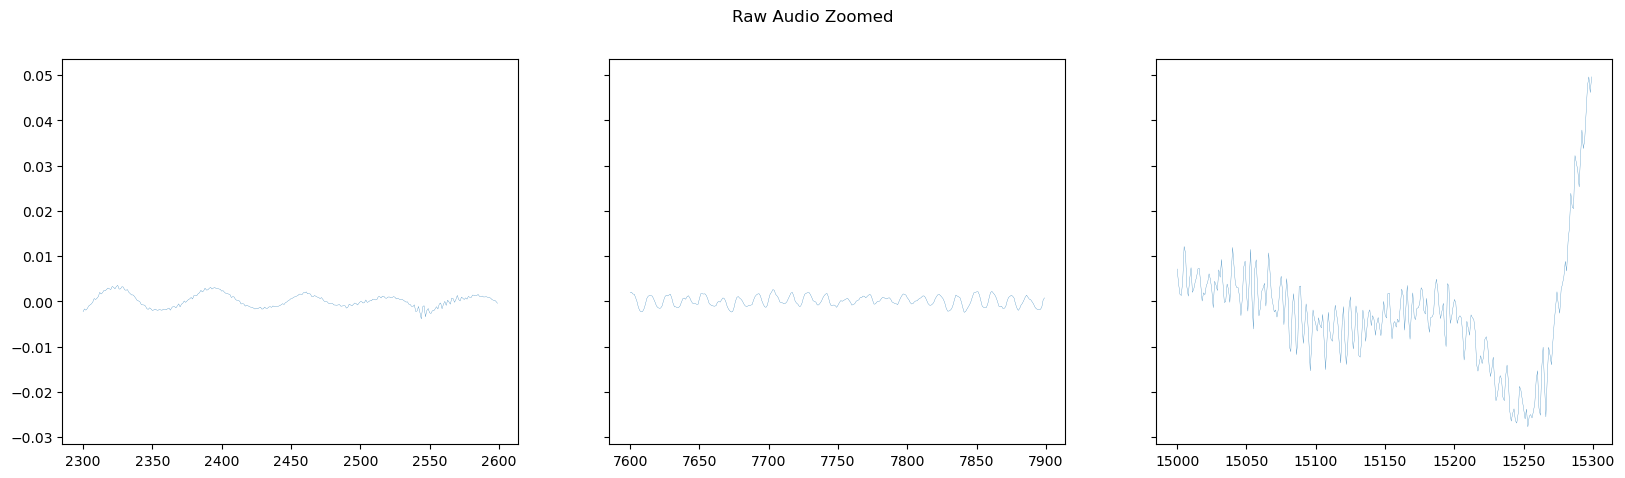

In [20]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(20, 5))
pd.Series(y)[2300:2600].plot(lw=0.2, ax=ax1)
pd.Series(y)[7600:7900].plot(lw=0.2, ax=ax2)
pd.Series(y)[15000:15300].plot(lw=0.2, ax=ax3)
fig.suptitle('Raw Audio Zoomed')
plt.show()


### 2. applying Fourier transformation

In [38]:
# short-time fourier transform
D = librosa.stft(y)
D.shape

(1025, 45)

c:\Users\burjo\miniconda3\envs\speech\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


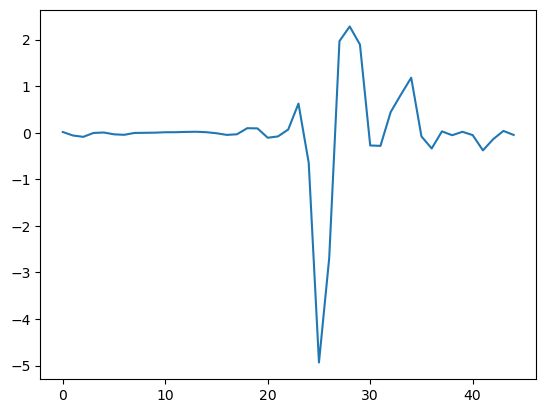

In [39]:
pd.Series(D[40]).plot();

In [40]:
# converting to decibels - sort of logarifmic, closer to human perception of sound 
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)  # ref is what mapped to 0db, all other values will be negative
S_db.shape

(1025, 45)

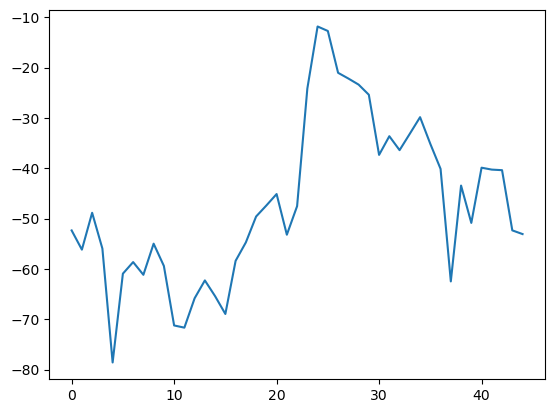

In [41]:
pd.Series(S_db[40]).plot();

### 3. Drawing a spectrogram

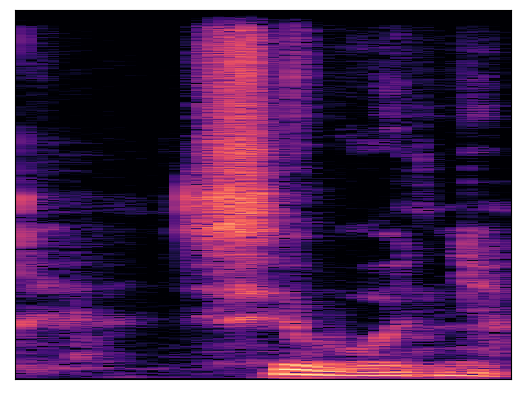

In [42]:
librosa.display.specshow(S_db)

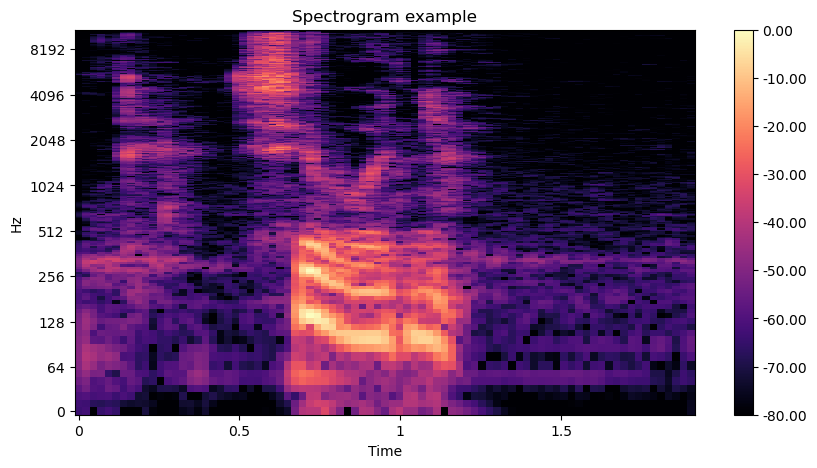

In [17]:
fig, ax = plt.subplots(figsize=(10, 5))
img = librosa.display.specshow(S_db, x_axis='time', y_axis='log', ax=ax)
ax.set_title('Spectrogram example')
fig.colorbar(img, ax=ax, format=f'%0.2f');

## Mel-Spectrogram

In [41]:
S_mel = librosa.feature.melspectrogram(y=y, sr=sr)
S_mel.shape

(128, 35)

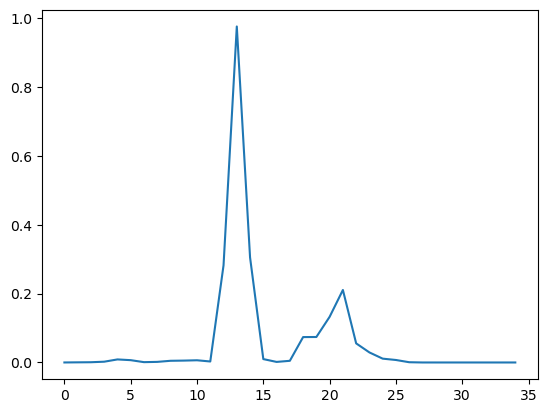

In [44]:
pd.Series(S_mel[40]).plot();

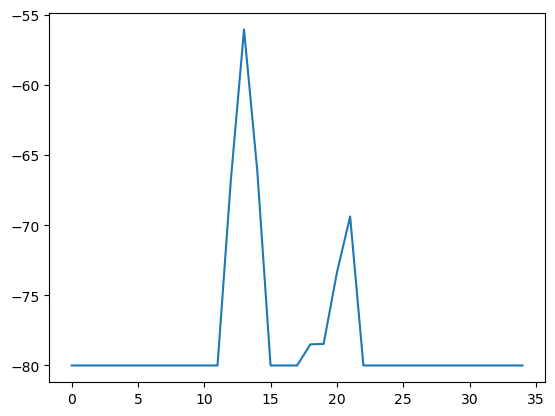

In [45]:
S_db_mel = librosa.amplitude_to_db(S_mel, ref=np.max)

pd.Series(S_db_mel[40]).plot();

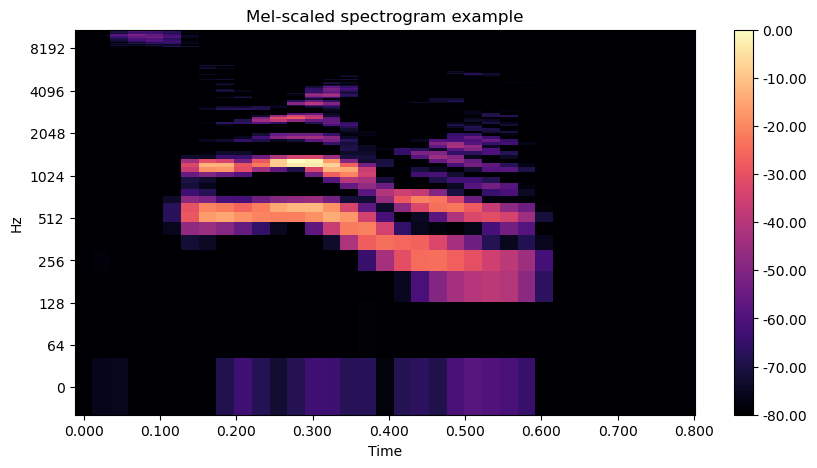

In [46]:
fig, ax = plt.subplots(figsize=(10, 5))
img = librosa.display.specshow(S_db_mel, x_axis='time', y_axis='log', ax=ax)
ax.set_title('Mel-scaled spectrogram example')
fig.colorbar(img, ax=ax, format=f'%0.2f');

## Saving spectrogram to file

In [3]:
from pathlib import Path

In [47]:
def create_spectrogram(audio_path, name):
    # creating a spectrogram
    y, sr = librosa.load(audio_path)
    y, index = librosa.effects.trim(y, top_db=30, frame_length=256, hop_length=64)
    D = librosa.stft(y)
    S_db = librosa.amplitude_to_db(D, ref=np.max)

    # saving to file
    plt.interactive(False)
    fig, ax = plt.subplots(figsize=(0.72, 0.72))
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.set_frame_on(False)
    librosa.display.specshow(S_db)
    saving_path = Path('../data/specs/today/' + name + '.jpg')
    plt.savefig(saving_path, dpi=400, bbox_inches='tight', pad_inches=0)
    plt.close()
    fig.clf()
    plt.close(fig)
    plt.close('all')
    del audio_path, D, S_db, sr, fig, ax, saving_path




In [49]:
audio_files = glob('..\\data\\audio\\to_process\\*.wav')
create_spectrogram(audio_files[0], 'input')

C:\Users\burjo\AppData\Local\Temp\ipykernel_17776\3324532950.py:3: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path)
C:\Users\burjo\AppData\Local\Temp\ipykernel_17776\3324532950.py:6: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  S_db = librosa.amplitude_to_db(D, ref=np.max)


In [21]:
librosa.load('..\\data\\audio\\to_process\\tts.mp3')

(array([0.        , 0.        , 0.        , ..., 0.01181129, 0.01077663,
        0.        ], dtype=float32),
 22050)

: 